## Transformers

In [1]:
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 68.5 MB/s eta 0:00:00


In [10]:
from transformers import AutoTokenizer, AutoModelForMaskedLM

model_id = "CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment"

bert_tokenizer = AutoTokenizer.from_pretrained(model_id)
bert_model = AutoModelForMaskedLM.from_pretrained(model_id)

Some weights of the model checkpoint at CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment were not used when initializing BertForMaskedLM: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForMaskedLM were not initialized from the model checkpoint at CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment and are newly initialized: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']

In [ ]:
bert_tokenizer.vocab

In [ ]:
# bert_tokenizer.vocab

In [12]:
# sentence = "السلام عليكم و رحمة الله"

sentence = "الاسلام "

tokens = bert_tokenizer.encode(sentence)
for t_id in tokens:
    print(t_id, '-->', bert_tokenizer.decode(t_id))

2 --> [CLS]
4339 --> الاسلام
3 --> [SEP]


In [13]:
bert_tokenizer.vocab_size

30000

In [ ]:
!pip install simpletransformers

## Build Own classification Model

In [16]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import pandas as pd
import logging

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='macro') , accuracy_score(labels,preds)


In [17]:
import pandas as pd
import numpy as np 


In [18]:
dataset=pd.read_excel('/content/original_dataset.xlsx')



In [19]:
dataset=dataset[['review_description','rating']]
dataset.head()


,review_description,rating
0,سيئ جدا بعد الإصدار الجديد,-1
1,ابلكيشن زباله بجد,-1
2,سيئ التطبيق لايعمل,-1
3,للأسف التطبيق للأسوأ كان جدا رائع وسهل وبسيط ا...,-1
4,التحديث بطيئ جدا جدا عند الفتح,-1


# **prepare dataset**

In [20]:
dataset.rename(columns={'review_description':'text','rating': 'labels'}, inplace=True, errors='raise')

<ipython-input-20-06d718b988d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.rename(columns={'review_description':'text','rating': 'labels'}, inplace=True, errors='raise')


In [21]:
def encode(x):
  if x==-1:
    return 0
  if x==0:
    return 1
  return 2

In [22]:
dataset['labels']=dataset['labels'].apply(encode)

In [23]:
num_rows=dataset.shape[0]
dataset = dataset.sample(frac = 1)

In [24]:
train=dataset[:int(num_rows*.90)]
test=dataset[int(num_rows*.90):]


In [28]:
model_id = "CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment"

# Optional model configuration
model_args = ClassificationArgs(num_train_epochs=4, overwrite_output_dir=True)

# Create a ClassificationModel
model = ClassificationModel(
    'bert',
    model_id,
    num_labels=3,
    args=model_args,
    use_cuda=True
)

# **train model**

In [29]:
# Train the model
model.train_model(train)

  0%|          | 0/60414 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/7552 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Running Epoch 1 of 4:   0%|          | 0/7552 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/7552 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/7552 [00:00<?, ?it/s]

(30208, 0.29727047225223635)

## **Evaluate the model**

In [92]:
# Evaluate the model
result, model_outputs, wrong_predictions = model.eval_model(test, f1_multiclass=f1_multiclass)

print(result)

  0%|          | 0/6713 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/840 [00:00<?, ?it/s]

{'mcc': 0.8469876202951371, 'f1_multiclass': (0.8974821998047076, 0.8981081483688366), 'eval_loss': 0.4109837368662868}


In [72]:
result_train, model_outputs_train, wrong_predictions_train = model.eval_model(train, f1_multiclass=f1_multiclass)

print(result_train)

  0%|          | 0/60414 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/7552 [00:00<?, ?it/s]

{'mcc': 0.9458422907175497, 'f1_multiclass': (0.9638013119888836, 0.963965306054888), 'eval_loss': 0.1422478658256542}


In [74]:
pred=[]
pred_train=[]
for i in model_outputs:
  pred.append(np.argmax(i))
for i in model_outputs_train:
  pred_train.append(np.argmax(i))

In [35]:
from sklearn.metrics import confusion_matrix,mean_squared_error,precision_score,recall_score,f1_score ,classification_report
from sklearn import metrics

In [77]:
print("Test accuracy  :",metrics.accuracy_score(pred, test['labels']) *100 ,"%")
print("MSE [test]         :",mean_squared_error(test['labels'],pred ))




Test accuracy  : 89.81081483688365 %
MSE [test]         : 0.1917175629375838


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns 

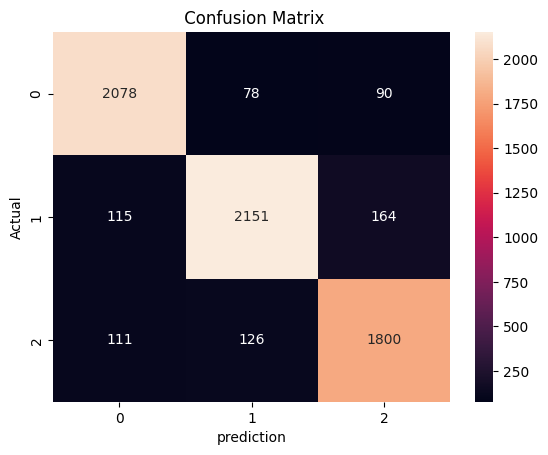

           classification_report for test
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      2246
           1       0.91      0.89      0.90      2430
           2       0.88      0.88      0.88      2037

    accuracy                           0.90      6713
   macro avg       0.90      0.90      0.90      6713
weighted avg       0.90      0.90      0.90      6713

           classification_report for train
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     20789
           1       0.97      0.96      0.96     21323
           2       0.96      0.96      0.96     18302

    accuracy                           0.96     60414
   macro avg       0.96      0.96      0.96     60414
weighted avg       0.96      0.96      0.96     60414



In [81]:
cf1 = confusion_matrix(test['labels'],pred)
sns.heatmap(cf1,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title(' Confusion Matrix')
plt.show()
print("           classification_report for test")
print(classification_report(test['labels'], pred))
print("           classification_report for train")
print(classification_report(train['labels'],pred_train))

In [82]:
model_dir = "bert_finetuned"
model.save_model(model_dir)

In [95]:
model.model.save_pretrained('model1')
model.tokenizer.save_pretrained('model1')
model.config.save_pretrained('model1/')